# TP 1 : CNN

Le but de ce TP sera de vous familiariser avec l'utilisation de TensorFlow et Keras pour la création et l'entraînement de modèles fully-connected puis à convolutions simples.
Vous entraînerez des modèles sur une tâche de classification sur les jeux de données MNIST.
Ces jeux de données sont composés d'images de dimensions 28x28 et ont l'avantage d'être très simples d'utilisation ainsi que de permettre un apprentissage rapide.

Nous allons utiliser la librairie TensorFlow et faire tourner notre code sous Google Colab pour nos TP, ce qui aura l'avantage de nous permettre d'utiliser les GPUs mis à disposition gratuitement par Google.
Vous êtes libre d'utiliser une autre librairie que TensorFlow si vous en maîtrisez une autre ou votre machine personnelle si celle-ci possède un GPU suffisant, mais il est probable que les phases d'entraînement soit plus rapides sous Colab.

N'hésitez pas à vous référer aux docs de TensorFlow 2 et Keras disponibles sur internet lors de ce TP.

Ce TP s'effectue individuellement.
Veuillez respecter les consignes suivantes pour le rendu de votre travail :

*   Renommez le selon le format suivant : "TP_CNN_prenom_nom.ipynb".
*   Veillez à ce que votre nom et prénom soient complétés dans la cellule ci-dessous.
*   Veillez à avoir bien exécuté toutes les cellules de code et que les résultats soient tous bien visible dans le notebook sans nécessiter une ré-exécution.
*   Partagez le notebook avec ranvier.thomas.pro@gmail.com.

Si vous avez effectué le TP autrement que sur Google Colab :

*   Renommez le selon le format suivant : "TP_CNN_prenom_nom.ipynb".
*   Téléchargez le fichier ipynb.
*   Envoyez le fichier en pièce-jointe à ranvier.thomas.pro@gmail.com, en indiquant en tant qu'objet : "TP CNN prenom nom".

---

## Veuillez compléter votre nom et prénom ci-dessous :

*   **Prenom** : Jean Philippe Cedric 
*   **Nom** : N'DRI

In [ ]:
import tensorflow as tf

# Si vous obtenez une erreur à ce niveau veuillez suivre ces indications :
# "Modifier" > "Paramètres du notebook" > "Accélérateur matériel" > "GPU"
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print(f'Found GPU: {device_name}')

Found GPU: /device:GPU:0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

---
# Preparation des données MNIST

Vous allez utiliser le jeu de données MNIST qui contient des chiffres ayant été écrit à la main, le but va être de créer des réseaux de neurones qui vont apprendre à reconnaître et correctement classifier ces chiffres.

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Il est important de toujours normaliser les données entre 0 et 1 pour qu'un réseau de neurones soit capable de les traiter convenablement.

Normalisez les données entre 0 et 1

Ajoutez une dimension vide supplémentaire aux données, elle correspond à la dimension des channels dont les convolutions ont besoin.

Par exemple, les dimensions de x_train sont (60000, 28, 28), elles doivent devenir (60000, 28, 28, 1)

In [ ]:
# Add channel dimension
# Pour normaliser il faut diviser par 255
x_train = x_train/255
x_test = x_test/255

In [ ]:
# Pour rajouter une autre dim a nos données 
x_train=x_train[...,np.newaxis]
x_test=x_test[...,np.newaxis]

In [ ]:
display(x_train.shape, x_test.shape)


(60000, 28, 28, 1)

(10000, 28, 28, 1)

Séparez le jeu de données d'entraînement en un jeu de validation de taille 10000 et un nouveau jeu d'entraînement de taille 50000.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split train val
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.16666667,random_state=1)


In [ ]:
display(x_train.shape, x_test.shape)

(49999, 28, 28, 1)

(10000, 28, 28, 1)

Si les traîtements effectués ci-dessus sur les données sont corrects l'execution de la cellule de code suivante devrait vous afficher les 25 premières images d'entraînement associées à leurs labels.

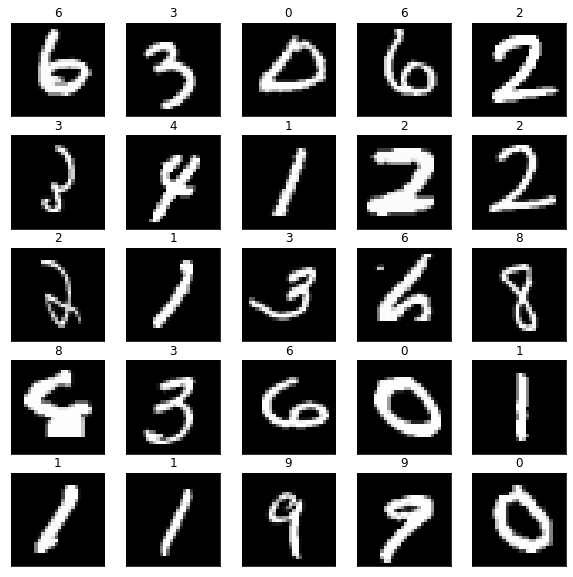

In [ ]:
# Plot grid with first 25 training images with their corresponding label
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(y_train[i])
plt.show()

---
# Préparation du Trainer

Cette classe sera utilisé tout au long du TP pour entraîner les différents modèles à mettre en place.
Vous devrez compléter les parties utiles signifiées dans le code par les commentaires "..." au fur et à mesure que vous avancerez dans le TP.
Une description de ce que chaque méthode doit faire est écrit dans les docstrings de chaque méthode.

Vous pourrez obtenir un bonus en implémentant un entraînement sur des mini-batches.

In [ ]:
class Trainer:
    def __init__(self, model, loss_function, optimizer):
        self._model = model
        self._loss_function = loss_function
        self._optimizer = optimizer
        # Metrics
        self._train_loss = tf.keras.metrics.Mean()
        self._val_loss = tf.keras.metrics.Mean()
        self._train_acc = tf.keras.metrics.SparseCategoricalAccuracy()
        self._val_acc = tf.keras.metrics.SparseCategoricalAccuracy()
        # History
        self._train_loss_h = []
        self._train_acc_h = []
        self._val_loss_h = []
        self._val_acc_h = []
    # definition de la fonction fit
    def fit(self, x_train, y_train, x_val, y_val, epochs, verbose=True):
        """
        Cette méthode permet d'entraîner le modèle sur x_train et y_train pour
        un certain nombre d'epochs
        """
        for epoch in range(epochs):
            # Reset metrics for each epoch
            self._train_loss.reset_states() 
            self._train_acc.reset_states()
            self._val_acc.reset_states()
            self._val_loss.reset_states()
            # Train the model for one epoch
            self._train_step(x_train,y_train )

        
            # Perform a validation step

            # Forward propagation des données x dans le modèle pour obtenir les prédictions
            #predictions = model( x_val )
            # Calcul de la loss entre les targets y et les prédictions obtenues
            #loss = loss_function(y_val , predictions)

            self._eval_step(x_val,y_val)


            # Update history
            self._train_loss_h.append(self._train_loss.result())
            self._train_acc_h.append(self._train_acc.result() * 100.)
            self._val_loss_h.append(self._val_loss.result())
            self._val_acc_h.append(self._val_acc.result() * 100.)
            if verbose:
                print((f'Epoch {epoch+1}/{epochs} - '
                       f'loss: {self._train_loss_h[-1]:.6f} - '
                       f'train acc: {self._train_acc_h[-1]:.2f}% - '
                       f'val acc: {self._val_acc_h[-1]:.2f}%'))
        
    def plot_history(self):
        plt.figure(figsize=(10,10))
        plt.subplot(2, 1, 1)
        plt.plot(self._train_loss_h, label='train')
        plt.plot(self._val_loss_h, label='val')
        plt.legend()
        plt.title('Loss')
        plt.subplot(2, 1, 2)
        plt.plot(self._train_acc_h, label='train')
        plt.plot(self._val_acc_h, label='val')
        plt.legend()
        plt.title('Acc')
        plt.show()

    def predict(self, x_test):
        """
        Cette méthode doit retourner les prédiction du modèle pour les données 
        x_test
        """
        return(self._model(x_test))
        
        
        
    @tf .function
    def _train_step(self, x, y):
        """
        Cette méthode doit performer une étape d'entrainement, c'est à dire :
            - Feed forward de x dans le modèle
            - Calcul de la loss entre y et les prédictions du modèle
            - Mise à jour des métriques self._train_acc et self._train_loss,
              cf https://keras.io/api/metrics/
            - Calcul du gradient
            - Application du gradient par l'optimizer
        """
        with tf.GradientTape( ) as tape :
          # Forward propagation des données x dans le modèle pour obtenir les prédictions
          predictions = self._model( x )
          self._train_acc.update_state(y,predictions)
          # Calcul de la loss entre les targets y et les prédictions obtenues
          loss = loss_function(y , predictions)
          self._train_loss.update_state(loss)
        # Calcul automatique du gradient par TensorFlow sur les paramètres du modèle
        # ( model . trainable _ variables )
        gradients = tape.gradient(loss ,self._model.trainable_variables)
      # Mise à jour des paramè tres enutilisant l’algorithme d’optimisation
      # ( backward propagation )
        optimizer . apply_gradients ( zip ( gradients ,self._model.trainable_variables))
                          

    @tf.function      
    def _eval_step(self, x, y):
        """
        Cette méthode doit performer une étape de validation :
            - Feed forward de x dans le modèle
            - Calcul de la loss entre y et les prédictions du modèle
            - Mise à jour des métriques self._val_acc et self._val_loss,
              cf https://keras.io/api/metrics/
        """
        # Forward propagation des données x dans le modèle pour obtenir les prédictions
        predictions = model( x )
        self._val_acc.update_state(y,predictions)
        # Calcul de la loss entre les targets y et les prédictions obtenues
        loss = loss_function(y , predictions)
        self._val_loss.update_state(loss)
        pass

In [ ]:
class Trainer_MiniB:
    def __init__(self, model, loss_function, optimizer):
        self._model = model
        self._loss_function = loss_function
        self._optimizer = optimizer
        # Metrics
        self._train_loss = tf.keras.metrics.Mean()
        self._val_loss = tf.keras.metrics.Mean()
        self._train_acc = tf.keras.metrics.SparseCategoricalAccuracy()
        self._val_acc = tf.keras.metrics.SparseCategoricalAccuracy()
        # History
        self._train_loss_h = []
        self._train_acc_h = []
        self._val_loss_h = []
        self._val_acc_h = []
    # definition de la fonction fit
    def fit(self, x_train, y_train, x_val, y_val, epochs,batch_size, verbose=True):
        """
        Cette méthode permet d'entraîner le modèle sur x_train et y_train pour
        un certain nombre d'epochs
        """
         # Séparer les données x en un nombre f i x é de mini −batches
        split_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
        for epoch in range(epochs):
            # Reset metrics for each epoch
            self._train_loss.reset_states() 
            self._train_acc.reset_states()
            self._val_acc.reset_states()
            self._val_loss.reset_states()
            # Train the model for one epoch
            self._train_step(split_ds)

        
            # Perform a validation step

            # Forward propagation des données x dans le modèle pour obtenir les prédictions
            #predictions = model( x_val )
            # Calcul de la loss entre les targets y et les prédictions obtenues
            #loss = loss_function(y_val , predictions)

            self._eval_step(x_val,y_val)


            # Update history
            self._train_loss_h.append(self._train_loss.result())
            self._train_acc_h.append(self._train_acc.result() * 100.)
            self._val_loss_h.append(self._val_loss.result())
            self._val_acc_h.append(self._val_acc.result() * 100.)
            if verbose:
                print((f'Epoch {epoch+1}/{epochs} - '
                       f'loss: {self._train_loss_h[-1]:.6f} - '
                       f'train acc: {self._train_acc_h[-1]:.2f}% - '
                       f'val acc: {self._val_acc_h[-1]:.2f}%'))
        
    def plot_history(self):
        plt.figure(figsize=(10,10))
        plt.subplot(2, 1, 1)
        plt.plot(self._train_loss_h, label='train')
        plt.plot(self._val_loss_h, label='val')
        plt.legend()
        plt.title('Loss')
        plt.subplot(2, 1, 2)
        plt.plot(self._train_acc_h, label='train')
        plt.plot(self._val_acc_h, label='val')
        plt.legend()
        plt.title('Acc')
        plt.show()

    def predict(self, x_test):
        """
        Cette méthode doit retourner les prédiction du modèle pour les données 
        x_test
        """
        return(self._model(x_test))
        
        
        
    @tf .function
    def _train_step(self,split_ds):
        """
        Cette méthode doit performer une étape d'entrainement, c'est à dire :
            - Feed forward de x dans le modèle
            - Calcul de la loss entre y et les prédictions du modèle
            - Mise à jour des métriques self._train_acc et self._train_loss,
              cf https://keras.io/api/metrics/
            - Calcul du gradient
            - Application du gradient par l'optimizer
        """
   
        for x_batch , y_batch in split_ds:
          with tf.GradientTape( )as tape:
            # Obtenir les pré d i c t i o n s pour l a mini −batch courante
            predictions = model( x_batch )
            # Calcul de l a loss pour l a mini −batch courante
            loss = loss_function(y_batch , predictions)
            self._train_acc.update_state(y_batch,predictions)
            self._train_loss.update_state(loss)
          gradients = tape.gradient(loss,model.trainable_variables)
          optimizer.apply_gradients(zip(gradients , model.trainable_variables))

                          

    @tf.function      
    def _eval_step(self, x, y):
        """
        Cette méthode doit performer une étape de validation :
            - Feed forward de x dans le modèle
            - Calcul de la loss entre y et les prédictions du modèle
            - Mise à jour des métriques self._val_acc et self._val_loss,
              cf https://keras.io/api/metrics/
        """
        # Forward propagation des données x dans le modèle pour obtenir les prédictions
        predictions = model( x )
        self._val_acc.update_state(y,predictions)
        # Calcul de la loss entre les targets y et les prédictions obtenues
        loss = loss_function(y , predictions)
        self._val_loss.update_state(loss)
        pass

---
# Entraîner un modèle fully-connected sur les données MNIST

Vous devez définir un modèle fully-connected, ainsi que les hyper-paramètres que le modèle utilisera lors de son apprentissage.
Cherchez la meilleure architecture et les meilleurs paramètres possibles de manière empirique en testant différentes choses.
Reportez vous à la documentation Keras https://keras.io/api/ pour connaître les différentes fonctionnalités utilisables ainsi que les paramètres qu'il est possible de modifier pour chaque.

L'objectif ici est d'obtenir une accuracy d'au minimum 96% sur le jeu de test.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Epoch 1/200 - loss: 2.368889 - train acc: 10.67% - val acc: 16.29%
Epoch 2/200 - loss: 2.225471 - train acc: 16.69% - val acc: 27.17%
Epoch 3/200 - loss: 2.101099 - train acc: 27.86% - val acc: 40.33%
Epoch 4/200 - loss: 1.985857 - train acc: 40.01% - val acc: 51.24%
Epoch 5/200 - loss: 1.875241 - train acc: 50.75% - val acc: 59.10%
Epoch 6/200 - loss: 1.767752 - train acc: 58.64% - val acc: 64.39%
Epoch 7/200 - loss: 1.663509 - train acc: 63.75% - val acc: 67.68%
Epoch 8/200 - loss: 1.563269 - train acc: 67.09% - val acc: 70.06%
Epoch 9/200 - loss: 1.467471 - train acc: 69.69% - val acc: 72.14%
Epoch 10/200 - loss: 1.376235 - train acc: 71.83% - val acc: 73.88%
Epoch 11/200 - loss: 1.289734 - train acc: 73.51% - val acc: 75.26%
Epoch 12/200 - loss: 1.208244 - train acc: 74.97% - val acc: 76.61%
Epoch 13/200 - loss: 1.132080 - train acc: 76.25% - val acc: 77.86%
Epoch 14/200 - loss: 1.061564 - train acc: 77.41% - val acc: 78.99%
Epoch 15/200 - loss: 0.996873 - train acc: 78.48% - val a

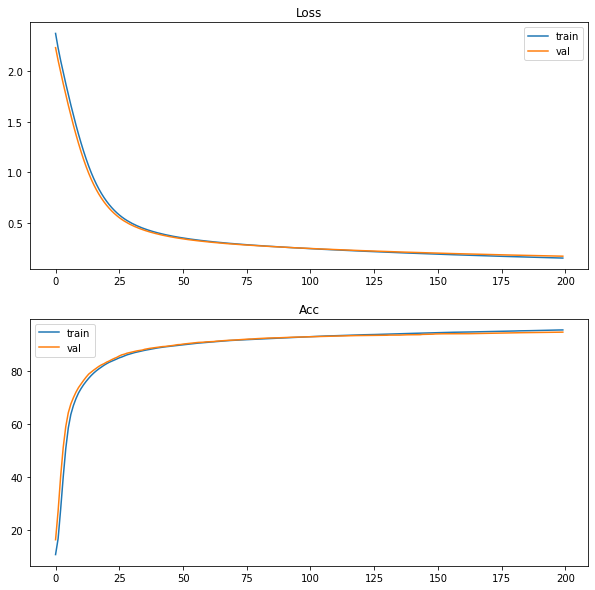

Test accuracy: 95.18%


In [ ]:
# Define model, for a fully-connected network the input must be properly adapted
model = tf.keras.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units=128 ,activation = 'relu') ,
            tf.keras.layers.Dense(units=10 , activation = 'softmax')])

# Set hyperparameters
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()
epochs = 200

# Initialize trainer
mnist_fc_trainer = Trainer(model=model,
                           loss_function=loss_function,
                           optimizer=optimizer)

# Train model
mnist_fc_trainer.fit(x_train, y_train, x_val, y_val, epochs)

# Plot training history
mnist_fc_trainer.plot_history()

# Evaluate on test set
test_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='test_acc')
predictions = mnist_fc_trainer.predict(x_test)
test_acc(y_test, predictions)
print(f'Test accuracy: {test_acc.result()*100.:.2f}%')

---
# Entraîner un modèle à convolutions sur les données MNIST

Vous devez définir un CNN, ainsi que les hyper-paramètres que le modèle utilisera lors de son apprentissage.
Cherchez la meilleure architecture et les meilleurs paramètres possibles de manière empirique en testant différentes choses.
Reportez vous à la documentation Keras https://keras.io/api/ pour connaître les différentes fonctionnalités utilisables ainsi que les paramètres qu'il est possible de modifier pour chaque.

L'objectif ici est d'obtenir une accuracy d'au minimum 98% sur le jeu de test.

Vous pourrez obtenir un bonus en ajoutant aux endroits opportuns dans l'architecture du modèle une ou des batch-normalizations, et un ou des dropouts.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Epoch 1/200 - loss: 0.576297 - train acc: 81.93% - val acc: 87.91%
Epoch 2/200 - loss: 0.324098 - train acc: 89.53% - val acc: 89.82%
Epoch 3/200 - loss: 0.273803 - train acc: 91.25% - val acc: 90.68%
Epoch 4/200 - loss: 0.245903 - train acc: 92.07% - val acc: 91.25%
Epoch 5/200 - loss: 0.226754 - train acc: 92.63% - val acc: 91.76%
Epoch 6/200 - loss: 0.212270 - train acc: 93.13% - val acc: 92.27%
Epoch 7/200 - loss: 0.200781 - train acc: 93.49% - val acc: 92.66%
Epoch 8/200 - loss: 0.190139 - train acc: 93.73% - val acc: 92.80%
Epoch 9/200 - loss: 0.182177 - train acc: 93.99% - val acc: 92.86%
Epoch 10/200 - loss: 0.174834 - train acc: 94.26% - val acc: 93.07%
Epoch 11/200 - loss: 0.168393 - train acc: 94.52% - val acc: 93.10%
Epoch 12/200 - loss: 0.162831 - train acc: 94.70% - val acc: 93.12%
Epoch 13/200 - loss: 0.157757 - train acc: 94.81% - val acc: 93.21%
Epoch 14/200 - loss: 0.152633 - train acc: 95.01% - val acc: 93.31%
Epoch 15/200 - loss: 0.148535 - train acc: 95.13% - val a

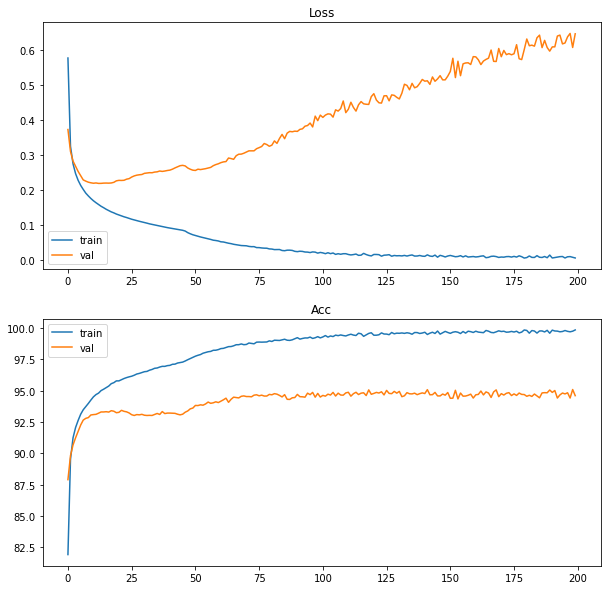

Test accuracy: 94.82%


In [ ]:
# Define model
model = tf.keras.Sequential([
  #First conv layer
  tf.keras.layers.Conv2D( 10 , 1 , strides=1 , padding=  'same' , activation =   'relu' ),
  tf.keras.layers.MaxPool2D(pool_size =(2 ,2 )),
  # Second conv layer
  tf.keras.layers.Conv2D( 10 , 1 , strides =1 , padding= 'same' , activation = 'relu' ),
  tf.keras.layers . MaxPool2D( pool_size =(2 ,2 )),
  # Batch norm for stabilization
  tf.keras.layers.BatchNormalization( ),
  # F l a t t e n data i n t o a vector f o r the f u l l y −connected part
  tf.keras.layers.Flatten( ),
  tf.keras.layers.Dense(units=128 , activation = 'relu' ),
  tf.keras.layers.Dense( units=10, activation =  'softmax')
] )

# Set hyperparameters
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()
epochs = 20

# Initialize trainer
mnist_cnn_trainer = Trainer_MiniB(model=model,
                            loss_function=loss_function,
                            optimizer=optimizer)

# Train model
mnist_cnn_trainer.fit(x_train, y_train, x_val, y_val, epochs,batch_size=64)

# Plot training history
mnist_cnn_trainer.plot_history()

# Evaluate on test set
test_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='test_acc')
predictions = mnist_cnn_trainer.predict(x_test)
test_acc(y_test, predictions)
print(f'Test accuracy: {test_acc.result()*100.:.2f}%')

---
# Préparation des données Fashion MNIST

Vous allez utiliser le jeu de données Fashion MNIST qui contient des images de vétements, le but va être de créer des réseaux de neurones qui vont apprendre à reconnaître et correctement classifier les images.

Vous devez définir un CNN, ainsi que les hyper-paramètres que le modèle utilisera lors de son apprentissage.
Cherchez la meilleure architecture et les meilleurs paramètres possibles de manière empirique en testant différentes choses.
Reportez vous à la documentation Keras https://keras.io/api/ pour connaître les différentes fonctionnalités utilisables ainsi que les paramètres qu'il est possible de modifier pour chaque.

L'objectif ici est d'obtenir une accuracy d'au minimum 90% sur le jeu de test.

Vous pourrez obtenir un bonus en ajoutant aux endroits opportuns dans l'architecture du modèle une ou des batch-normalizations, et un ou des dropouts.


In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Normalize data
x_train = x_train/255
x_test = x_test/255
# Add channel dimension to MNIST data
x_train=x_train[...,np.newaxis]
x_test=x_test[...,np.newaxis]
# Split train val
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.16666667,random_state=1)

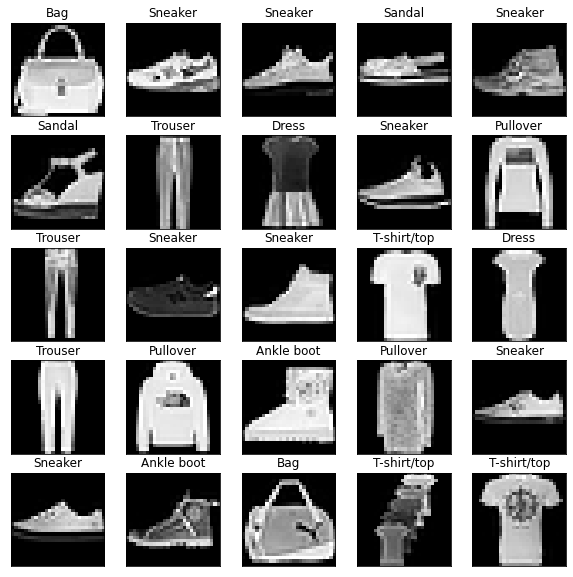

In [ ]:
# Plot grid with first 25 training images with their corresponding label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(class_names[y_train[i]])
plt.show()

In [1]:
# Define model
model = tf.keras.Sequential([
  #First conv layer
  tf.keras.layers.Conv2D( 10 , 5 , strides=1 , padding=  'same' , activation =   'relu' ),
  tf.keras.layers.MaxPool2D(pool_size =(2 ,2 )),
  # Second conv layer
  tf.keras.layers.Conv2D( 5 , 3 , strides =1 , padding= 'same' , activation = 'relu' ),
  tf.keras.layers . MaxPool2D( pool_size =(2 ,2 )),
  # Batch norm for stabilization
  tf.keras.layers.BatchNormalization( ),
  # F l a t t e n data i n t o a vector f o r the f u l l y −connected part
  tf.keras.layers.Flatten( ),
  tf.keras.layers.Dense(units=128 , activation = 'relu' ),
  tf.keras.layers.Dense( units=10, activation =  'softmax')
] )

# Set hyperparameters
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()
epochs = 200

# Initialize trainer
mnist_cnn_trainer = Trainer_MiniB(model=model,
                            loss_function=loss_function,
                            optimizer=optimizer)

# Train model
mnist_cnn_trainer.fit(x_train, y_train, x_val, y_val, epochs,batch_size=64)

# Plot training history
mnist_cnn_trainer.plot_history()

# Evaluate on test set
test_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='test_acc')
predictions = mnist_cnn_trainer.predict(x_test)
test_acc(y_test, predictions)
print(f'Test accuracy: {test_acc.result()*100.:.2f}%')

NameError: ignored

Si l'apprentissage ci-dessus s'est bien passé l'executions des 2 cellules de code suivantes devraient vous afficher respectivement les 25 premières images de test avec le label prédit et le label réel pour chaque et les 40 premières images de test avec les probabilités émisent par le modèle pour chacune des classes.

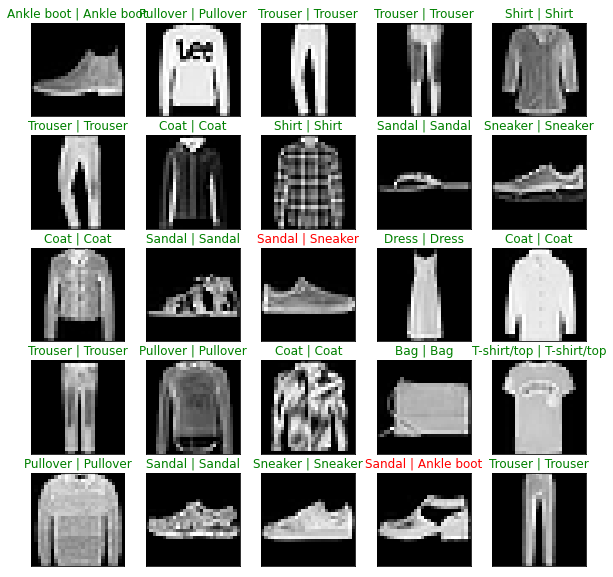

In [ ]:
# Plot grid with first 25 test images with their predicted and true label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    pred = predictions[i].numpy().argmax()
    true = y_test[i]
    color = 'green' if pred == true else 'red'
    plt.title(f'{class_names[pred]} | {class_names[true]}', color=color)
plt.show()

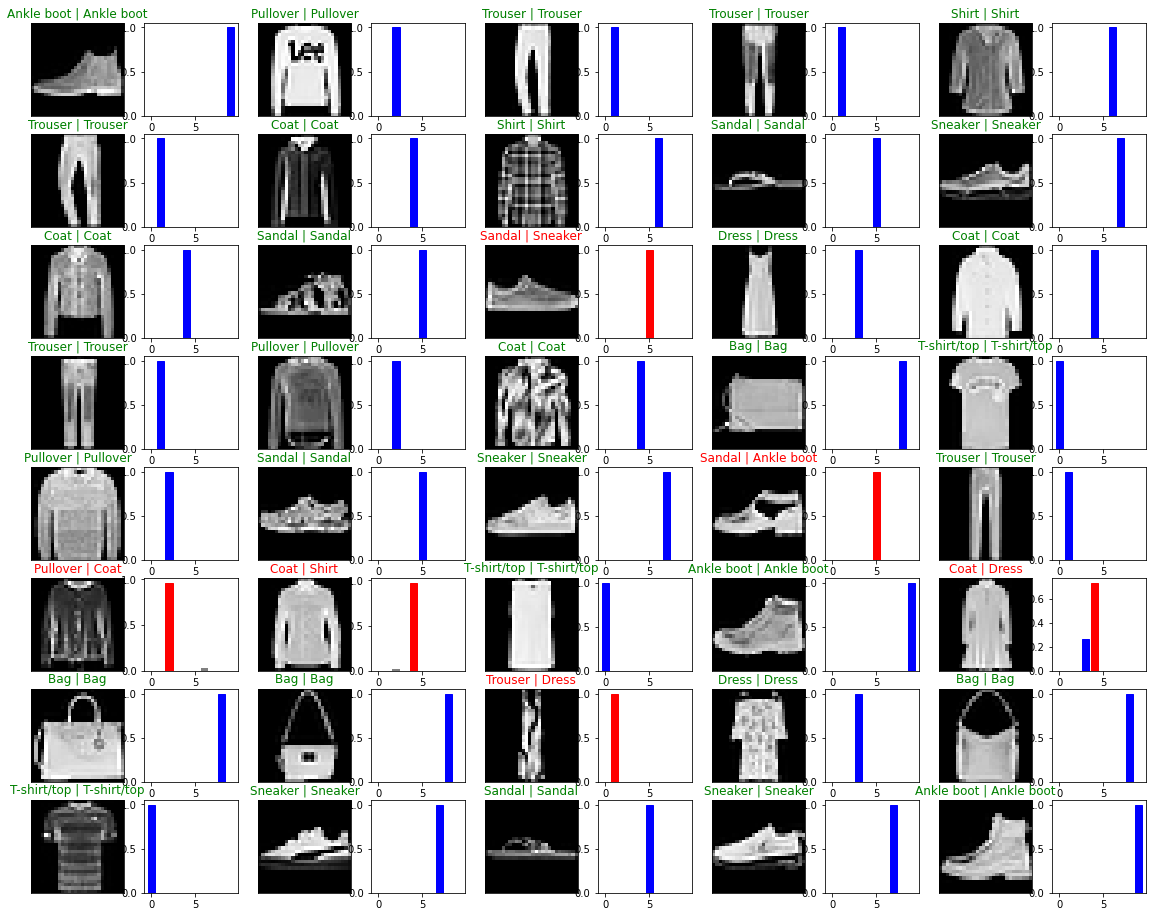

In [ ]:
# Plot grid with first 40 test images with the model probabilities
plt.figure(figsize=(20, 16))
for i in range(40):
    plt.subplot(8, 10, (i*2)+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    pred = predictions[i].numpy().argmax()
    true = y_test[i]
    color = 'green' if pred == true else 'red'
    plt.title(f'{class_names[pred]} | {class_names[true]}', color=color)
    plt.subplot(8, 10, (i*2)+2)
    barplt = plt.bar(list(range(len(class_names))), predictions[i].numpy(),
                     color='gray')
    barplt[pred].set_color('red')
    barplt[true].set_color('blue')
plt.show()